## Dependencias

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score, roc_auc_score
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree

## Importando la base

In [3]:
# Importando los datos

datos = pd.read_csv("student_prediction.csv")
datos

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


## Train y test

In [4]:
datos.drop(["COURSE ID","CUML_GPA","EXP_GPA"], axis = 1, inplace=True) # Eliminando variables que se considera no añaden información
datos.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,1,1,1,3,2,1,2,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,1,1,1,3,2,3,2,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,1,1,1,2,2,1,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,1,1,1,2,3,2,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,2,1,2,2,2,1,1


In [5]:
# Haciendo el train y test de x y (las 4 partes en que se dividen los datos)
train, test = train_test_split(datos, test_size= 0.2, shuffle=True) # el random state es para la semilla aleatoria, por lo que lo quitamos
                                                                    # el shuffle es para que sean ordenados, al no ser una serie de tiempo podemos dejarlo como "True"
print(train)

      STUDENTID  AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  \
16    STUDENT17    1       1        2            5     2         1        2   
128  STUDENT129    1       1        2            4     2         1        1   
45    STUDENT46    1       2        2            3     2         2        1   
143  STUDENT144    2       1        2            4     1         1        1   
113  STUDENT114    2       1        3            3     2         2        2   
..          ...  ...     ...      ...          ...   ...       ...      ...   
13    STUDENT14    2       1        2            5     2         2        2   
131  STUDENT132    1       1        1            5     2         1        2   
33    STUDENT34    2       1        2            3     1         2        1   
64    STUDENT65    2       2        3            5     2         2        2   
120  STUDENT121    2       1        1            3     1         1        1   

     SALARY  TRANSPORT  ...  ATTEND_DEPT  IMPACT  A

In [6]:
print(test)

      STUDENTID  AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  \
74    STUDENT75    1       2        2            4     2         2        2   
98    STUDENT99    1       2        2            4     2         1        2   
136  STUDENT137    1       1        2            3     1         1        1   
46    STUDENT47    2       2        2            3     2         2        1   
82    STUDENT83    2       2        2            4     1         2        1   
27    STUDENT28    1       2        1            3     1         2        2   
122  STUDENT123    1       2        2            5     2         1        2   
130  STUDENT131    1       1        2            3     1         1        2   
138  STUDENT139    1       1        2            4     1         1        1   
44    STUDENT45    2       2        3            3     2         2        1   
70    STUDENT71    1       2        2            4     2         1        1   
135  STUDENT136    2       1        2            3  

In [7]:
#se necesitan 4 grupos porque el algortimo x y y los van a testear por aparte y luego con x y y

x_train = train.drop(["GRADE", "STUDENTID"], 1)
y_train = train["GRADE"]
print(x_train)

     AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  SALARY  \
16     1       1        2            5     2         1        2       1   
128    1       1        2            4     2         1        1       1   
45     1       2        2            3     2         2        1       4   
143    2       1        2            4     1         1        1       5   
113    2       1        3            3     2         2        2       1   
..   ...     ...      ...          ...   ...       ...      ...     ...   
13     2       1        2            5     2         2        2       1   
131    1       1        1            5     2         1        2       1   
33     2       1        2            3     1         2        1       1   
64     2       2        3            5     2         2        2       1   
120    2       1        1            3     1         1        1       2   

     TRANSPORT  LIVING  ...  READ_FREQ_SCI  ATTEND_DEPT  IMPACT  ATTEND  \
16           1       1  

<ipython-input-7-7334dc9f994f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train.drop(["GRADE", "STUDENTID"], 1)


In [8]:
print(y_train)

16     1
128    0
45     3
143    4
113    1
      ..
13     1
131    4
33     2
64     3
120    1
Name: GRADE, Length: 116, dtype: int64


In [9]:
x_test = test.drop(["GRADE", "STUDENTID"], 1)
y_test = test["GRADE"]
print(x_test) #Confirmando que quede bien para que lo lea el algoritmo

     AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  SALARY  \
74     1       2        2            4     2         2        2       1   
98     1       2        2            4     2         1        2       1   
136    1       1        2            3     1         1        1       1   
46     2       2        2            3     2         2        1       1   
82     2       2        2            4     1         2        1       2   
27     1       2        1            3     1         2        2       1   
122    1       2        2            5     2         1        2       1   
130    1       1        2            3     1         1        2       1   
138    1       1        2            4     1         1        1       5   
44     2       2        3            3     2         2        1       1   
70     1       2        2            4     2         1        1       1   
135    2       1        2            3     1         1        2       1   
144    1       1        1

<ipython-input-9-35975e9e29c4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = test.drop(["GRADE", "STUDENTID"], 1)


In [10]:
print(y_test) #Confirmando que quede bien para que lo lea el algoritmo

74     7
98     7
136    0
46     5
82     7
27     1
122    2
130    1
138    0
44     1
70     7
135    2
144    3
91     6
123    1
73     6
43     4
3      1
112    2
106    7
75     7
89     6
38     2
11     0
80     4
101    7
28     3
29     5
116    1
Name: GRADE, dtype: int64


## Modelo KNN 1

In [11]:
# Definimos el modelo
ModeloKNN = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2) #ojala el numero de vecinos sea impar
# Etrenar el modelo
ModeloKNN.fit(x_train, y_train)
# Predicción
y_predKNN = ModeloKNN.predict(x_test)

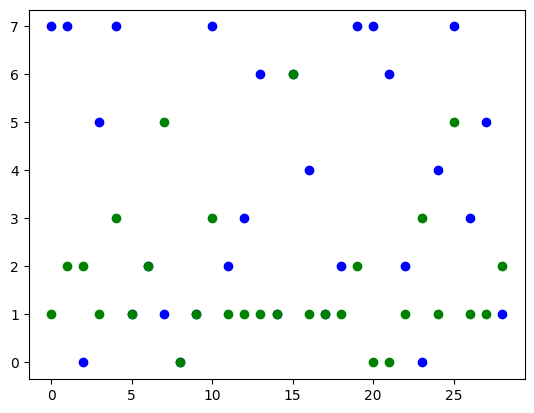

In [12]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predKNN, "go")
plt.show()

In [13]:
# Mariz de confusión
Matriz = confusion_matrix(y_test, y_predKNN)
print(Matriz)

[[1 0 1 1 0 0 0 0]
 [0 4 1 0 0 1 0 0]
 [0 3 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0]
 [1 1 2 2 0 1 0 0]]


In [14]:
#Otras métricas
precision4=precision_score(y_test, y_predKNN,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predKNN)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predKNN, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predKNN,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predKNN_a=ModeloKNN.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predKNN_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.225
Exactitud del modelo:  0.2414
Sensibilidad del modelo:  0.1979
Puntaje f1 del modelo:  0.1796
Curva ROC_AUC del modelo 0.5235394074524509


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
## Validación cruzada

#Definir x y y
x = x_train
y = y_train

In [16]:
kf = KFold(n_splits= 6)# Número de divisiones
# Se quiere evaluar el modelo para cada división
scores=cross_val_score(ModeloKNN, x, y, cv=kf, scoring="accuracy")

In [17]:
#Resultados
print("Métricas de validación cruzada",scores)
print("Métricas de validación cruzada",scores.mean())

Métricas de validación cruzada [0.05       0.25       0.21052632 0.31578947 0.21052632 0.21052632]
Métricas de validación cruzada 0.20789473684210524


## Modelo KNN 2

In [18]:
# Definimos el modelo
ModeloKNN2 = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) #ojala el numero de vecinos sea impar
# Etrenar el modelo
ModeloKNN2.fit(x_train, y_train)
# Predicción
y_predKNN2 = ModeloKNN2.predict(x_test)

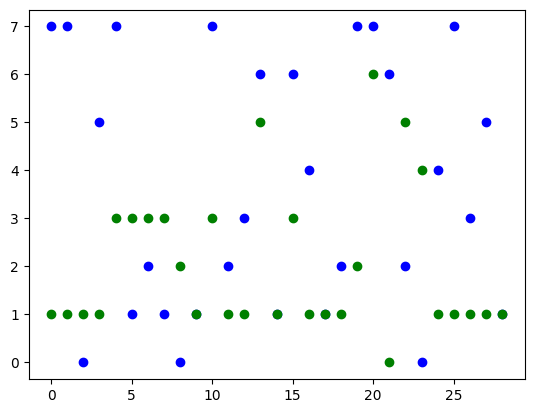

In [19]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predKNN2, "go")
plt.show()

In [20]:
# Mariz de confusión
Matriz2 = confusion_matrix(y_test, y_predKNN2)
print(Matriz2)

[[0 1 1 0 1 0 0 0]
 [0 4 0 2 0 0 0 0]
 [0 2 0 1 0 1 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [1 0 0 1 0 1 0 0]
 [0 3 1 2 0 0 1 0]]


In [21]:
#Otras métricas
precision4=precision_score(y_test, y_predKNN2,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predKNN2)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predKNN2, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predKNN2,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predKNN2_a=ModeloKNN2.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predKNN2_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.0312
Exactitud del modelo:  0.1379
Sensibilidad del modelo:  0.0833
Puntaje f1 del modelo:  0.0455
Curva ROC_AUC del modelo 0.5114948256252604


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo KNN 3

In [22]:
# Definimos el modelo
ModeloKNN3 = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2) #ojala el numero de vecinos sea impar
# Etrenar el modelo
ModeloKNN3.fit(x_train, y_train)
# Predicción
y_predKNN3 = ModeloKNN3.predict(x_test)

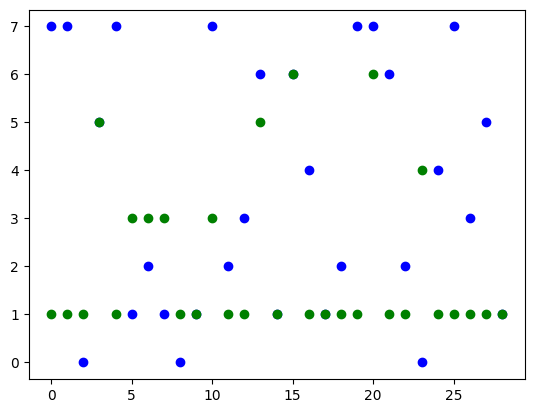

In [23]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predKNN3, "go")
plt.show()

In [24]:
# Mariz de confusión
Matriz3 = confusion_matrix(y_test, y_predKNN3)
print(Matriz3)

[[0 2 0 0 1 0 0 0]
 [0 4 0 2 0 0 0 0]
 [0 3 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0]
 [0 1 0 0 0 1 1 0]
 [0 5 0 1 0 0 1 0]]


In [25]:
#Otras métricas
precision4=precision_score(y_test, y_predKNN3,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predKNN3)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predKNN3, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predKNN3,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predKNN3_a=ModeloKNN3.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predKNN3_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.15
Exactitud del modelo:  0.2069
Sensibilidad del modelo:  0.1875
Puntaje f1 del modelo:  0.151
Curva ROC_AUC del modelo 0.5409707723838159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo bosques aleatorios 1

In [26]:
# Modelo
ModeloBos = RandomForestClassifier(n_estimators=50, criterion="gini") # si es de regresión es mejor darle la profundidad
# Entrenamiento
ModeloBos.fit(x_train, y_train)
# Predicción
y_predBos = ModeloBos.predict(x_test)

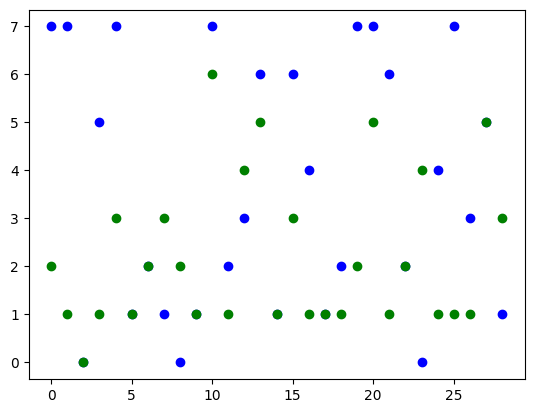

In [27]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predBos, "go")
plt.show()

In [28]:
# Mariz de confusión
Matriz4 = confusion_matrix(y_test, y_predBos)
print(Matriz4) # 3 quedaron por fuera

[[1 0 1 0 1 0 0 0]
 [0 4 0 2 0 0 0 0]
 [0 2 2 0 0 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 2 2 1 0 1 1 0]]


In [29]:
#Otras métricas
precision4=precision_score(y_test, y_predBos,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predBos)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predBos, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predBos,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predBos_a=ModeloBos.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predBos_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.2551
Exactitud del modelo:  0.2759
Sensibilidad del modelo:  0.25
Puntaje f1 del modelo:  0.2207
Curva ROC_AUC del modelo 0.6324040562899258


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo bosques aleatorios 2

In [30]:
# Modelo
ModeloBos2 = RandomForestClassifier(n_estimators=70, criterion="gini") # si es de regresión es mejor darle la profundidad
# Entrenamiento
ModeloBos2.fit(x_train, y_train)
# Predicción
y_predBos2 = ModeloBos2.predict(x_test)

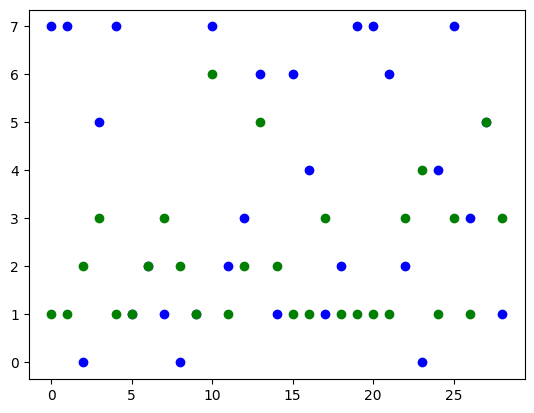

In [31]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predBos2, "go")
plt.show()

In [32]:
# Mariz de confusión
Matriz5 = confusion_matrix(y_test, y_predBos2)
print(Matriz5)

[[0 0 2 0 1 0 0 0]
 [0 2 1 3 0 0 0 0]
 [0 2 1 1 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 2 0 0 0 1 0 0]
 [0 5 0 1 0 0 1 0]]


In [33]:
#Otras métricas
precision4=precision_score(y_test, y_predBos2,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predBos2)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predBos2, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predBos2,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predBos2_a=ModeloBos2.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predBos2_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.1054
Exactitud del modelo:  0.1379
Sensibilidad del modelo:  0.1354
Puntaje f1 del modelo:  0.1153
Curva ROC_AUC del modelo 0.53952681477138


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo bosques aleatorios 3

In [34]:
# Modelo
ModeloBos3 = RandomForestClassifier(n_estimators=100, criterion="gini") # si es de regresión es mejor darle la profundidad
# Entrenamiento
ModeloBos3.fit(x_train, y_train)
# Predicción
y_predBos3 = ModeloBos3.predict(x_test)

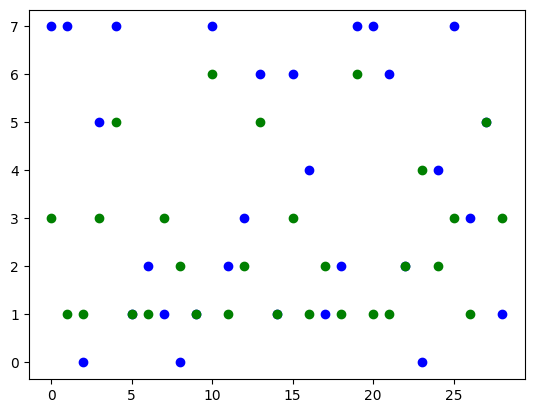

In [35]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predBos3, "go")
plt.show()  # se comparan los 2 métodos

In [36]:
# Mariz de confusión
Matriz6 = confusion_matrix(y_test, y_predBos3)
print(Matriz6)

[[0 1 1 0 1 0 0 0]
 [0 3 1 2 0 0 0 0]
 [0 3 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 2 0 2 0 1 2 0]]


In [37]:
#Otras métricas
precision4=precision_score(y_test, y_predBos3,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predBos3)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predBos3, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predBos3,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predBos3_a=ModeloBos3.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predBos3_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.0979
Exactitud del modelo:  0.1724
Sensibilidad del modelo:  0.1562
Puntaje f1 del modelo:  0.1194
Curva ROC_AUC del modelo 0.6625119284901894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo bosques aleatorios 4

In [38]:
# Modelo
ModeloBos4 = RandomForestClassifier(n_estimators=50, criterion="entropy") # si es de regresión es mejor darle la profundidad
# Entrenamiento
ModeloBos4.fit(x_train, y_train)
# Predicción
y_predBos4 = ModeloBos4.predict(x_test)

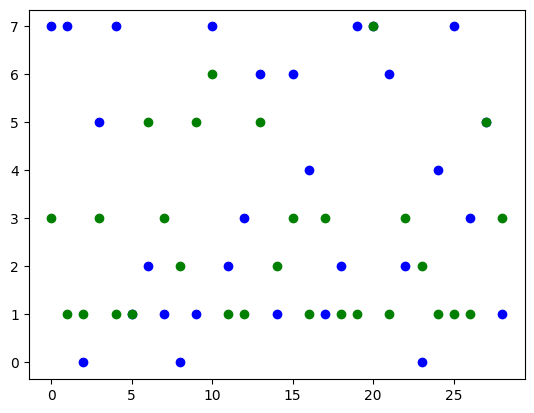

In [39]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predBos4, "go")
plt.show()  # se comparan los 2 métodos

In [40]:
# Mariz de confusión
Matriz7 = confusion_matrix(y_test, y_predBos4)
print(Matriz7)

[[0 1 2 0 0 0 0 0]
 [0 1 1 3 0 1 0 0]
 [0 2 0 1 0 1 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 4 0 1 0 0 1 1]]


In [41]:
#Otras métricas
precision4=precision_score(y_test, y_predBos4,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predBos4)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predBos4, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predBos4,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predBos4_a=ModeloBos4.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predBos4_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.1659
Exactitud del modelo:  0.1034
Sensibilidad del modelo:  0.1012
Puntaje f1 del modelo:  0.0861
Curva ROC_AUC del modelo 0.6078783374435548


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
kf = KFold(n_splits= 6)# Número de divisiones
# Se quiere evaluar el modelo para cada división
scores=cross_val_score(ModeloBos4, x, y, cv=kf, scoring="accuracy")

In [54]:
#Resultados
print("Métricas de validación cruzada",scores)
print("Métricas de validación cruzada",scores.mean())

Métricas de validación cruzada [0.15       0.15       0.15789474 0.31578947 0.21052632 0.15789474]
Métricas de validación cruzada 0.19035087719298247


## Modelo bosques aleatorios 5

In [42]:
# Modelo
ModeloBos5 = RandomForestClassifier(n_estimators=70, criterion="entropy") # si es de regresión es mejor darle la profundidad
# Entrenamiento
ModeloBos5.fit(x_train, y_train)
# Predicción
y_predBos5 = ModeloBos5.predict(x_test)

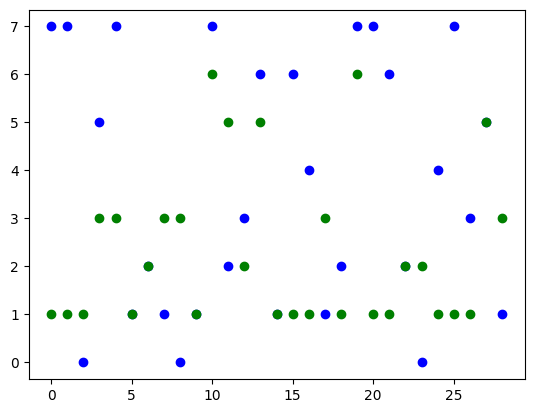

In [43]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predBos5, "go")
plt.show()  # se comparan los 2 métodos

In [44]:
# Mariz de confusión
Matriz8 = confusion_matrix(y_test, y_predBos5)
print(Matriz8)

[[0 1 1 1 0 0 0 0]
 [0 3 0 3 0 0 0 0]
 [0 1 2 0 0 1 0 0]
 [0 1 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 2 0 0 0 1 0 0]
 [0 4 0 1 0 0 2 0]]


In [45]:
#Otras métricas
precision4=precision_score(y_test, y_predBos5,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predBos5)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predBos5, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predBos5,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predBos5_a=ModeloBos5.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predBos5_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.131
Exactitud del modelo:  0.2069
Sensibilidad del modelo:  0.1875
Puntaje f1 del modelo:  0.15
Curva ROC_AUC del modelo 0.618546802432672


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo bosques aleatorios 6

In [46]:
# Modelo
ModeloBos6 = RandomForestClassifier(n_estimators=100, criterion="entropy") # si es de regresión es mejor darle la profundidad
# Entrenamiento
ModeloBos6.fit(x_train, y_train)
# Predicción
y_predBos6 = ModeloBos6.predict(x_test)

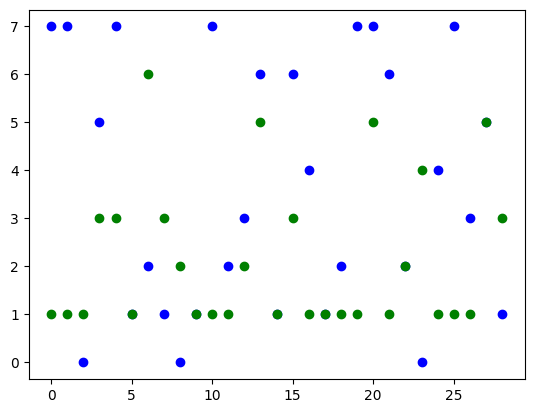

In [47]:
# Graficos
plt.plot(np.array(y_test), "bo")
plt.plot(y_predBos6, "go")
plt.show()  # se comparan los 2 métodos

In [48]:
# Mariz de confusión
Matriz9 = confusion_matrix(y_test, y_predBos6)
print(Matriz9)

[[0 1 1 0 1 0 0 0]
 [0 4 0 2 0 0 0 0]
 [0 2 1 0 0 0 1 0]
 [0 1 1 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0]
 [0 5 0 1 0 1 0 0]]


In [49]:
#Otras métricas
precision4=precision_score(y_test, y_predBos6,average="macro")
print("Precisión del modelo: ", round(precision4,4))
exactitud4=accuracy_score(y_test, y_predBos6)
print("Exactitud del modelo: ", round(exactitud4,4))
sensibilidad4=recall_score(y_test, y_predBos6, average="macro")
print("Sensibilidad del modelo: ", round(sensibilidad4,4))
puntajef_14=f1_score(y_test, y_predBos6,average="macro")
print("Puntaje f1 del modelo: ", round(puntajef_14,4))

y_predBos6_a=ModeloBos6.predict_proba(x_test)
roc_auc4=roc_auc_score(y_test,y_predBos6_a, multi_class="ovr")
print("Curva ROC_AUC del modelo", roc_auc4)

Precisión del modelo:  0.1146
Exactitud del modelo:  0.2069
Sensibilidad del modelo:  0.1771
Puntaje f1 del modelo:  0.1312
Curva ROC_AUC del modelo 0.620940075423771


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
